In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_data_S9
from  Utils import test,train,plot_acc_loss
from models import model_summary

device = torch.device( 'cuda' if torch.cuda.is_available() else 'cpu')
print(device)

c:\Users\Aai\anaconda3\envs\pytorch\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


cuda


In [2]:
train_loader , test_loader = load_data_S9()

CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified


In [3]:
class S9_model(nn.Module):
    def __init__(self):
        super(S9_model,self).__init__()


        self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=3,out_channels=128,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Dropout2d(0.1),
            nn.Conv2d(in_channels=128,out_channels=32,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.Dropout2d(0.1),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32,out_channels=32,kernel_size=3,padding=1,groups=32),
            nn.Conv2d(in_channels=32,out_channels=32,kernel_size=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Dropout2d(0.1),
            nn.Conv2d(in_channels=32,out_channels=32,kernel_size=3,padding=2,dilation=2),
            nn.Conv2d(in_channels=32,out_channels=32,kernel_size=3,stride=2,padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Dropout2d(0.1)
        )
        self.convblock2 = nn.Sequential(
            nn.Conv2d(in_channels=32,out_channels=32,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Dropout2d(0.1),
            nn.Conv2d(in_channels=32,out_channels=32,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Dropout2d(0.1),
            nn.Conv2d(in_channels=32,out_channels=32,kernel_size=3,padding=1,groups=32),
            nn.Conv2d(in_channels=32,out_channels=32,kernel_size=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Dropout2d(0.1),
            nn.Conv2d(in_channels=32,out_channels=32,kernel_size=3,padding=2,dilation=4),
            nn.Conv2d(in_channels=32,out_channels=16,kernel_size=3,stride=2,padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.Dropout2d(0.1)
        )
        self.convblock3 = nn.Sequential(
            nn.Conv2d(in_channels=16,out_channels=32,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Dropout2d(0.1),
            nn.Conv2d(in_channels=32,out_channels=32,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Dropout2d(0.1),
            nn.Conv2d(in_channels=32,out_channels=32,kernel_size=3,padding=1,groups=32),
            nn.Conv2d(in_channels=32,out_channels=64,kernel_size=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Dropout2d(0.1),
            nn.Conv2d(in_channels=64,out_channels=32,kernel_size=3,padding=2,dilation=2),
            nn.Conv2d(in_channels=32,out_channels=32,kernel_size=3,stride=2,padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Dropout2d(0.1)
        )
        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=32,out_channels=16,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout2d(0.1),
            nn.Conv2d(in_channels=16,out_channels=16,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout2d(0.1),
            nn.Conv2d(in_channels=16,out_channels=16,kernel_size=3,padding=1,groups=16),
            nn.Conv2d(in_channels=16,out_channels=16,kernel_size=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.Dropout2d(0.1),
            nn.Conv2d(in_channels=16,out_channels=16,kernel_size=3,padding=2,dilation=2),
            nn.Conv2d(in_channels=16,out_channels=32,kernel_size=3,stride=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Dropout2d(0.1)
        )
        self.gap = nn.AdaptiveAvgPool2d((1,1))
        self.fc = nn.Linear(in_features=32,out_features=10)


    def forward(self,x):
        x = self.convblock1(x)
        x = self.convblock2(x)
        x = self.convblock3(x)
        x = self.convblock4(x)
        x = self.gap(x)
        x = x.view(x.size(0),-1)
        x = self.fc(x)
        x = F.log_softmax(x,dim=1)
        return x

In [4]:
model = S9_model().to(device)
model_summary(model,input_size=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 128, 32, 32]           3,584
              ReLU-2          [-1, 128, 32, 32]               0
       BatchNorm2d-3          [-1, 128, 32, 32]             256
         Dropout2d-4          [-1, 128, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]          36,896
              ReLU-6           [-1, 32, 32, 32]               0
         Dropout2d-7           [-1, 32, 32, 32]               0
       BatchNorm2d-8           [-1, 32, 32, 32]              64
            Conv2d-9           [-1, 32, 32, 32]             320
           Conv2d-10           [-1, 32, 32, 32]           1,056
      BatchNorm2d-11           [-1, 32, 32, 32]              64
             ReLU-12           [-1, 32, 32, 32]               0
        Dropout2d-13           [-1, 32, 32, 32]               0
           Conv2d-14           [-1, 32,

In [6]:

criterion = F.nll_loss
num_epochs = 180
optimizer_sgd = optim.SGD(model.parameters(), lr=0.01,momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer_sgd,gamma=0.9,step_size=30,)


for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer_sgd,criterion)
  test(model, device, test_loader, criterion)
  scheduler.step()



Epoch 1


100%|██████████| 20/20 [00:11<00:00,  1.71it/s]


Test set: Average loss: 0.0016, Accuracy: 7222/10000 (72.22%)

Epoch 2


100%|██████████| 20/20 [00:09<00:00,  2.07it/s]


Test set: Average loss: 0.0015, Accuracy: 7307/10000 (73.07%)

Epoch 3


100%|██████████| 20/20 [00:09<00:00,  2.05it/s]


Test set: Average loss: 0.0015, Accuracy: 7297/10000 (72.97%)

Epoch 4


100%|██████████| 20/20 [00:10<00:00,  1.88it/s]


Test set: Average loss: 0.0015, Accuracy: 7314/10000 (73.14%)

Epoch 5


100%|██████████| 20/20 [00:09<00:00,  2.11it/s]


Test set: Average loss: 0.0016, Accuracy: 7267/10000 (72.67%)

Epoch 6


100%|██████████| 20/20 [00:09<00:00,  2.12it/s]


Test set: Average loss: 0.0016, Accuracy: 7178/10000 (71.78%)

Epoch 7


100%|██████████| 20/20 [00:10<00:00,  1.86it/s]


Test set: Average loss: 0.0015, Accuracy: 7298/10000 (72.98%)

Epoch 8


100%|██████████| 20/20 [00:10<00:00,  1.87it/s]


Test set: Average loss: 0.0016, Accuracy: 7188/10000 (71.88%)

Epoch 9


100%|██████████| 20/20 [00:09<00:00,  2.07it/s]


Test set: Average loss: 0.0016, Accuracy: 7193/10000 (71.93%)

Epoch 10


100%|██████████| 20/20 [00:09<00:00,  2.11it/s]


Test set: Average loss: 0.0015, Accuracy: 7341/10000 (73.41%)

Epoch 11


100%|██████████| 20/20 [00:09<00:00,  2.05it/s]


Test set: Average loss: 0.0015, Accuracy: 7284/10000 (72.84%)

Epoch 12


100%|██████████| 20/20 [00:09<00:00,  2.08it/s]


Test set: Average loss: 0.0016, Accuracy: 7275/10000 (72.75%)

Epoch 13


100%|██████████| 20/20 [00:09<00:00,  2.10it/s]


Test set: Average loss: 0.0015, Accuracy: 7385/10000 (73.85%)

Epoch 14


100%|██████████| 20/20 [00:09<00:00,  2.08it/s]


Test set: Average loss: 0.0015, Accuracy: 7311/10000 (73.11%)

Epoch 15


100%|██████████| 20/20 [00:09<00:00,  2.11it/s]


Test set: Average loss: 0.0015, Accuracy: 7313/10000 (73.13%)

Epoch 16


100%|██████████| 20/20 [00:09<00:00,  2.11it/s]


Test set: Average loss: 0.0015, Accuracy: 7349/10000 (73.49%)

Epoch 17


100%|██████████| 20/20 [00:09<00:00,  2.12it/s]


Test set: Average loss: 0.0015, Accuracy: 7337/10000 (73.37%)

Epoch 18


100%|██████████| 20/20 [00:09<00:00,  2.10it/s]


Test set: Average loss: 0.0015, Accuracy: 7326/10000 (73.26%)

Epoch 19


100%|██████████| 20/20 [00:09<00:00,  2.09it/s]


Test set: Average loss: 0.0015, Accuracy: 7445/10000 (74.45%)

Epoch 20


100%|██████████| 20/20 [00:09<00:00,  2.11it/s]


Test set: Average loss: 0.0015, Accuracy: 7445/10000 (74.45%)

Epoch 21


100%|██████████| 20/20 [00:09<00:00,  2.12it/s]


Test set: Average loss: 0.0015, Accuracy: 7359/10000 (73.59%)

Epoch 22


100%|██████████| 20/20 [00:09<00:00,  2.12it/s]


Test set: Average loss: 0.0015, Accuracy: 7334/10000 (73.34%)

Epoch 23


100%|██████████| 20/20 [00:09<00:00,  2.11it/s]


Test set: Average loss: 0.0015, Accuracy: 7317/10000 (73.17%)

Epoch 24


100%|██████████| 20/20 [00:09<00:00,  2.10it/s]


Test set: Average loss: 0.0015, Accuracy: 7411/10000 (74.11%)

Epoch 25


100%|██████████| 20/20 [00:09<00:00,  2.10it/s]


Test set: Average loss: 0.0015, Accuracy: 7468/10000 (74.68%)

Epoch 26


100%|██████████| 20/20 [00:09<00:00,  2.15it/s]


Test set: Average loss: 0.0015, Accuracy: 7340/10000 (73.40%)

Epoch 27


100%|██████████| 20/20 [00:09<00:00,  2.12it/s]


Test set: Average loss: 0.0015, Accuracy: 7406/10000 (74.06%)

Epoch 28


100%|██████████| 20/20 [00:09<00:00,  2.13it/s]


Test set: Average loss: 0.0014, Accuracy: 7501/10000 (75.01%)

Epoch 29


100%|██████████| 20/20 [00:09<00:00,  2.13it/s]


Test set: Average loss: 0.0014, Accuracy: 7436/10000 (74.36%)

Epoch 30


100%|██████████| 20/20 [00:09<00:00,  2.13it/s]


Test set: Average loss: 0.0014, Accuracy: 7453/10000 (74.53%)

Epoch 31


100%|██████████| 20/20 [00:09<00:00,  2.12it/s]


Test set: Average loss: 0.0014, Accuracy: 7478/10000 (74.78%)

Epoch 32


100%|██████████| 20/20 [00:09<00:00,  2.13it/s]


Test set: Average loss: 0.0015, Accuracy: 7396/10000 (73.96%)

Epoch 33


100%|██████████| 20/20 [00:09<00:00,  2.12it/s]


Test set: Average loss: 0.0014, Accuracy: 7478/10000 (74.78%)

Epoch 34


100%|██████████| 20/20 [00:09<00:00,  2.13it/s]


Test set: Average loss: 0.0014, Accuracy: 7507/10000 (75.07%)

Epoch 35


100%|██████████| 20/20 [00:09<00:00,  2.11it/s]


Test set: Average loss: 0.0014, Accuracy: 7533/10000 (75.33%)

Epoch 36


100%|██████████| 20/20 [00:09<00:00,  2.13it/s]


Test set: Average loss: 0.0014, Accuracy: 7493/10000 (74.93%)

Epoch 37


100%|██████████| 20/20 [00:09<00:00,  2.13it/s]


Test set: Average loss: 0.0014, Accuracy: 7495/10000 (74.95%)

Epoch 38


100%|██████████| 20/20 [00:09<00:00,  2.14it/s]


Test set: Average loss: 0.0014, Accuracy: 7517/10000 (75.17%)

Epoch 39


100%|██████████| 20/20 [00:09<00:00,  2.13it/s]


Test set: Average loss: 0.0014, Accuracy: 7486/10000 (74.86%)

Epoch 40


100%|██████████| 20/20 [00:09<00:00,  2.12it/s]


Test set: Average loss: 0.0014, Accuracy: 7516/10000 (75.16%)

Epoch 41


100%|██████████| 20/20 [00:09<00:00,  2.13it/s]


Test set: Average loss: 0.0014, Accuracy: 7504/10000 (75.04%)

Epoch 42


100%|██████████| 20/20 [00:09<00:00,  2.13it/s]


Test set: Average loss: 0.0015, Accuracy: 7454/10000 (74.54%)

Epoch 43


100%|██████████| 20/20 [00:09<00:00,  2.13it/s]


Test set: Average loss: 0.0014, Accuracy: 7536/10000 (75.36%)

Epoch 44


100%|██████████| 20/20 [00:09<00:00,  2.13it/s]


Test set: Average loss: 0.0014, Accuracy: 7557/10000 (75.57%)

Epoch 45


100%|██████████| 20/20 [00:09<00:00,  2.13it/s]


Test set: Average loss: 0.0014, Accuracy: 7595/10000 (75.95%)

Epoch 46


100%|██████████| 20/20 [00:09<00:00,  2.13it/s]


Test set: Average loss: 0.0014, Accuracy: 7540/10000 (75.40%)

Epoch 47


100%|██████████| 20/20 [00:09<00:00,  2.13it/s]


Test set: Average loss: 0.0014, Accuracy: 7559/10000 (75.59%)

Epoch 48


100%|██████████| 20/20 [00:09<00:00,  2.13it/s]


Test set: Average loss: 0.0014, Accuracy: 7493/10000 (74.93%)

Epoch 49


100%|██████████| 20/20 [00:09<00:00,  2.13it/s]


Test set: Average loss: 0.0014, Accuracy: 7530/10000 (75.30%)

Epoch 50


100%|██████████| 20/20 [00:09<00:00,  2.13it/s]


Test set: Average loss: 0.0014, Accuracy: 7577/10000 (75.77%)

Epoch 51


100%|██████████| 20/20 [00:09<00:00,  2.14it/s]


Test set: Average loss: 0.0014, Accuracy: 7537/10000 (75.37%)

Epoch 52


100%|██████████| 20/20 [00:09<00:00,  2.13it/s]


Test set: Average loss: 0.0014, Accuracy: 7571/10000 (75.71%)

Epoch 53


100%|██████████| 20/20 [00:09<00:00,  2.13it/s]


Test set: Average loss: 0.0014, Accuracy: 7508/10000 (75.08%)

Epoch 54


100%|██████████| 20/20 [00:09<00:00,  2.12it/s]


Test set: Average loss: 0.0014, Accuracy: 7547/10000 (75.47%)

Epoch 55


100%|██████████| 20/20 [00:09<00:00,  2.13it/s]


Test set: Average loss: 0.0014, Accuracy: 7569/10000 (75.69%)

Epoch 56


100%|██████████| 20/20 [00:09<00:00,  2.13it/s]


Test set: Average loss: 0.0014, Accuracy: 7597/10000 (75.97%)

Epoch 57


100%|██████████| 20/20 [00:09<00:00,  2.09it/s]


Test set: Average loss: 0.0014, Accuracy: 7536/10000 (75.36%)

Epoch 58


100%|██████████| 20/20 [00:09<00:00,  2.13it/s]


Test set: Average loss: 0.0014, Accuracy: 7522/10000 (75.22%)

Epoch 59


100%|██████████| 20/20 [00:09<00:00,  2.12it/s]


Test set: Average loss: 0.0014, Accuracy: 7548/10000 (75.48%)

Epoch 60


100%|██████████| 20/20 [00:09<00:00,  2.14it/s]


Test set: Average loss: 0.0014, Accuracy: 7614/10000 (76.14%)

Epoch 61


100%|██████████| 20/20 [00:09<00:00,  2.12it/s]


Test set: Average loss: 0.0014, Accuracy: 7554/10000 (75.54%)

Epoch 62


100%|██████████| 20/20 [00:09<00:00,  2.04it/s]


Test set: Average loss: 0.0014, Accuracy: 7582/10000 (75.82%)

Epoch 63


100%|██████████| 20/20 [00:09<00:00,  2.10it/s]


Test set: Average loss: 0.0014, Accuracy: 7594/10000 (75.94%)

Epoch 64


100%|██████████| 20/20 [00:09<00:00,  2.14it/s]


Test set: Average loss: 0.0014, Accuracy: 7574/10000 (75.74%)

Epoch 65


100%|██████████| 20/20 [00:09<00:00,  2.14it/s]


Test set: Average loss: 0.0014, Accuracy: 7611/10000 (76.11%)

Epoch 66


100%|██████████| 20/20 [00:09<00:00,  2.10it/s]


Test set: Average loss: 0.0014, Accuracy: 7603/10000 (76.03%)

Epoch 67


100%|██████████| 20/20 [00:09<00:00,  2.13it/s]


Test set: Average loss: 0.0014, Accuracy: 7576/10000 (75.76%)

Epoch 68


100%|██████████| 20/20 [00:09<00:00,  2.10it/s]


Test set: Average loss: 0.0014, Accuracy: 7613/10000 (76.13%)

Epoch 69


100%|██████████| 20/20 [00:09<00:00,  2.09it/s]


Test set: Average loss: 0.0013, Accuracy: 7621/10000 (76.21%)

Epoch 70


100%|██████████| 20/20 [00:09<00:00,  2.13it/s]


Test set: Average loss: 0.0014, Accuracy: 7585/10000 (75.85%)

Epoch 71


100%|██████████| 20/20 [00:09<00:00,  2.13it/s]


Test set: Average loss: 0.0014, Accuracy: 7651/10000 (76.51%)

Epoch 72


100%|██████████| 20/20 [00:09<00:00,  2.13it/s]


Test set: Average loss: 0.0014, Accuracy: 7583/10000 (75.83%)

Epoch 73


100%|██████████| 20/20 [00:09<00:00,  2.13it/s]


Test set: Average loss: 0.0014, Accuracy: 7644/10000 (76.44%)

Epoch 74


100%|██████████| 20/20 [00:09<00:00,  2.13it/s]


Test set: Average loss: 0.0013, Accuracy: 7660/10000 (76.60%)

Epoch 75


100%|██████████| 20/20 [00:09<00:00,  2.13it/s]


Test set: Average loss: 0.0013, Accuracy: 7640/10000 (76.40%)

Epoch 76


100%|██████████| 20/20 [00:09<00:00,  2.12it/s]


Test set: Average loss: 0.0014, Accuracy: 7607/10000 (76.07%)

Epoch 77


100%|██████████| 20/20 [00:09<00:00,  2.13it/s]


Test set: Average loss: 0.0013, Accuracy: 7666/10000 (76.66%)

Epoch 78


100%|██████████| 20/20 [00:09<00:00,  2.13it/s]


Test set: Average loss: 0.0013, Accuracy: 7682/10000 (76.82%)

Epoch 79


100%|██████████| 20/20 [00:09<00:00,  2.12it/s]


Test set: Average loss: 0.0014, Accuracy: 7589/10000 (75.89%)

Epoch 80


100%|██████████| 20/20 [00:09<00:00,  2.13it/s]


Test set: Average loss: 0.0013, Accuracy: 7724/10000 (77.24%)

Epoch 81


100%|██████████| 20/20 [00:09<00:00,  2.13it/s]


Test set: Average loss: 0.0014, Accuracy: 7622/10000 (76.22%)

Epoch 82


100%|██████████| 20/20 [00:09<00:00,  2.08it/s]


Test set: Average loss: 0.0013, Accuracy: 7680/10000 (76.80%)

Epoch 83


100%|██████████| 20/20 [00:09<00:00,  2.10it/s]


Test set: Average loss: 0.0013, Accuracy: 7652/10000 (76.52%)

Epoch 84


100%|██████████| 20/20 [00:09<00:00,  2.14it/s]


Test set: Average loss: 0.0013, Accuracy: 7682/10000 (76.82%)

Epoch 85


100%|██████████| 20/20 [00:09<00:00,  2.09it/s]


Test set: Average loss: 0.0013, Accuracy: 7685/10000 (76.85%)

Epoch 86


100%|██████████| 20/20 [00:09<00:00,  2.09it/s]


Test set: Average loss: 0.0013, Accuracy: 7690/10000 (76.90%)

Epoch 87


100%|██████████| 20/20 [00:09<00:00,  2.13it/s]


Test set: Average loss: 0.0013, Accuracy: 7685/10000 (76.85%)

Epoch 88


100%|██████████| 20/20 [00:09<00:00,  2.10it/s]


Test set: Average loss: 0.0013, Accuracy: 7655/10000 (76.55%)

Epoch 89


100%|██████████| 20/20 [00:09<00:00,  2.09it/s]


Test set: Average loss: 0.0013, Accuracy: 7732/10000 (77.32%)

Epoch 90


100%|██████████| 20/20 [00:09<00:00,  2.14it/s]


Test set: Average loss: 0.0013, Accuracy: 7676/10000 (76.76%)

Epoch 91


100%|██████████| 20/20 [00:09<00:00,  2.09it/s]


Test set: Average loss: 0.0013, Accuracy: 7742/10000 (77.42%)

Epoch 92


100%|██████████| 20/20 [00:09<00:00,  2.09it/s]


Test set: Average loss: 0.0013, Accuracy: 7749/10000 (77.49%)

Epoch 93


100%|██████████| 20/20 [00:09<00:00,  2.09it/s]


Test set: Average loss: 0.0013, Accuracy: 7731/10000 (77.31%)

Epoch 94


100%|██████████| 20/20 [00:09<00:00,  2.09it/s]


Test set: Average loss: 0.0013, Accuracy: 7738/10000 (77.38%)

Epoch 95


100%|██████████| 20/20 [00:09<00:00,  2.09it/s]


Test set: Average loss: 0.0013, Accuracy: 7680/10000 (76.80%)

Epoch 96


100%|██████████| 20/20 [00:09<00:00,  2.14it/s]


Test set: Average loss: 0.0013, Accuracy: 7751/10000 (77.51%)

Epoch 97


100%|██████████| 20/20 [00:09<00:00,  2.13it/s]


Test set: Average loss: 0.0013, Accuracy: 7692/10000 (76.92%)

Epoch 98


100%|██████████| 20/20 [00:09<00:00,  2.10it/s]


Test set: Average loss: 0.0013, Accuracy: 7716/10000 (77.16%)

Epoch 99


100%|██████████| 20/20 [00:09<00:00,  2.13it/s]


Test set: Average loss: 0.0013, Accuracy: 7759/10000 (77.59%)

Epoch 100


100%|██████████| 20/20 [00:09<00:00,  2.09it/s]


Test set: Average loss: 0.0013, Accuracy: 7757/10000 (77.57%)

Epoch 101


100%|██████████| 20/20 [00:09<00:00,  2.04it/s]


Test set: Average loss: 0.0013, Accuracy: 7713/10000 (77.13%)

Epoch 102


100%|██████████| 20/20 [00:09<00:00,  2.08it/s]


Test set: Average loss: 0.0013, Accuracy: 7740/10000 (77.40%)

Epoch 103


100%|██████████| 20/20 [00:09<00:00,  2.08it/s]


Test set: Average loss: 0.0013, Accuracy: 7706/10000 (77.06%)

Epoch 104


100%|██████████| 20/20 [00:09<00:00,  2.08it/s]


Test set: Average loss: 0.0013, Accuracy: 7753/10000 (77.53%)

Epoch 105


100%|██████████| 20/20 [00:09<00:00,  2.05it/s]


Test set: Average loss: 0.0013, Accuracy: 7685/10000 (76.85%)

Epoch 106


100%|██████████| 20/20 [00:09<00:00,  2.04it/s]


Test set: Average loss: 0.0013, Accuracy: 7693/10000 (76.93%)

Epoch 107


100%|██████████| 20/20 [00:09<00:00,  2.07it/s]


Test set: Average loss: 0.0013, Accuracy: 7741/10000 (77.41%)

Epoch 108


100%|██████████| 20/20 [00:09<00:00,  2.09it/s]


Test set: Average loss: 0.0013, Accuracy: 7738/10000 (77.38%)

Epoch 109


100%|██████████| 20/20 [00:09<00:00,  2.05it/s]


Test set: Average loss: 0.0013, Accuracy: 7771/10000 (77.71%)

Epoch 110


100%|██████████| 20/20 [00:09<00:00,  2.08it/s]


Test set: Average loss: 0.0013, Accuracy: 7762/10000 (77.62%)

Epoch 111


100%|██████████| 20/20 [00:09<00:00,  2.08it/s]


Test set: Average loss: 0.0013, Accuracy: 7740/10000 (77.40%)

Epoch 112


100%|██████████| 20/20 [00:09<00:00,  2.09it/s]


Test set: Average loss: 0.0013, Accuracy: 7713/10000 (77.13%)

Epoch 113


100%|██████████| 20/20 [00:09<00:00,  2.00it/s]


Test set: Average loss: 0.0013, Accuracy: 7772/10000 (77.72%)

Epoch 114


100%|██████████| 20/20 [00:09<00:00,  2.04it/s]


Test set: Average loss: 0.0013, Accuracy: 7789/10000 (77.89%)

Epoch 115


100%|██████████| 20/20 [00:09<00:00,  2.05it/s]


Test set: Average loss: 0.0013, Accuracy: 7764/10000 (77.64%)

Epoch 116


100%|██████████| 20/20 [00:09<00:00,  2.08it/s]


Test set: Average loss: 0.0013, Accuracy: 7751/10000 (77.51%)

Epoch 117


100%|██████████| 20/20 [00:09<00:00,  2.05it/s]


Test set: Average loss: 0.0013, Accuracy: 7812/10000 (78.12%)

Epoch 118


100%|██████████| 20/20 [00:09<00:00,  2.08it/s]


Test set: Average loss: 0.0013, Accuracy: 7777/10000 (77.77%)

Epoch 119


100%|██████████| 20/20 [00:09<00:00,  2.05it/s]


Test set: Average loss: 0.0013, Accuracy: 7738/10000 (77.38%)

Epoch 120


100%|██████████| 20/20 [00:09<00:00,  2.06it/s]


Test set: Average loss: 0.0013, Accuracy: 7789/10000 (77.89%)

Epoch 121


100%|██████████| 20/20 [00:09<00:00,  2.05it/s]


Test set: Average loss: 0.0013, Accuracy: 7807/10000 (78.07%)

Epoch 122


100%|██████████| 20/20 [00:09<00:00,  2.09it/s]


Test set: Average loss: 0.0013, Accuracy: 7782/10000 (77.82%)

Epoch 123


100%|██████████| 20/20 [00:09<00:00,  2.09it/s]


Test set: Average loss: 0.0013, Accuracy: 7721/10000 (77.21%)

Epoch 124


100%|██████████| 20/20 [00:09<00:00,  2.05it/s]


Test set: Average loss: 0.0013, Accuracy: 7761/10000 (77.61%)

Epoch 125


100%|██████████| 20/20 [00:09<00:00,  2.09it/s]


Test set: Average loss: 0.0013, Accuracy: 7775/10000 (77.75%)

Epoch 126


100%|██████████| 20/20 [00:09<00:00,  2.08it/s]


Test set: Average loss: 0.0013, Accuracy: 7760/10000 (77.60%)

Epoch 127


100%|██████████| 20/20 [00:09<00:00,  2.07it/s]


Test set: Average loss: 0.0013, Accuracy: 7763/10000 (77.63%)

Epoch 128


100%|██████████| 20/20 [00:09<00:00,  2.05it/s]


Test set: Average loss: 0.0013, Accuracy: 7775/10000 (77.75%)

Epoch 129


100%|██████████| 20/20 [00:09<00:00,  2.08it/s]


Test set: Average loss: 0.0013, Accuracy: 7794/10000 (77.94%)

Epoch 130


100%|██████████| 20/20 [00:09<00:00,  2.08it/s]


Test set: Average loss: 0.0013, Accuracy: 7776/10000 (77.76%)

Epoch 131


100%|██████████| 20/20 [00:09<00:00,  2.04it/s]


Test set: Average loss: 0.0013, Accuracy: 7698/10000 (76.98%)

Epoch 132


100%|██████████| 20/20 [00:16<00:00,  1.23it/s]


Test set: Average loss: 0.0013, Accuracy: 7772/10000 (77.72%)

Epoch 133


100%|██████████| 20/20 [00:13<00:00,  1.49it/s]


Test set: Average loss: 0.0013, Accuracy: 7855/10000 (78.55%)

Epoch 134


100%|██████████| 20/20 [00:15<00:00,  1.29it/s]


Test set: Average loss: 0.0013, Accuracy: 7795/10000 (77.95%)

Epoch 135


100%|██████████| 20/20 [00:15<00:00,  1.32it/s]


Test set: Average loss: 0.0013, Accuracy: 7802/10000 (78.02%)

Epoch 136


100%|██████████| 20/20 [00:15<00:00,  1.31it/s]


Test set: Average loss: 0.0013, Accuracy: 7795/10000 (77.95%)

Epoch 137


100%|██████████| 20/20 [00:15<00:00,  1.33it/s]


Test set: Average loss: 0.0013, Accuracy: 7805/10000 (78.05%)

Epoch 138


100%|██████████| 20/20 [00:14<00:00,  1.35it/s]


Test set: Average loss: 0.0013, Accuracy: 7806/10000 (78.06%)

Epoch 139


100%|██████████| 20/20 [00:14<00:00,  1.35it/s]


Test set: Average loss: 0.0012, Accuracy: 7842/10000 (78.42%)

Epoch 140


100%|██████████| 20/20 [00:14<00:00,  1.35it/s]


Test set: Average loss: 0.0013, Accuracy: 7785/10000 (77.85%)

Epoch 141


100%|██████████| 20/20 [00:14<00:00,  1.34it/s]


Test set: Average loss: 0.0013, Accuracy: 7835/10000 (78.35%)

Epoch 142


100%|██████████| 20/20 [00:18<00:00,  1.09it/s]


Test set: Average loss: 0.0013, Accuracy: 7773/10000 (77.73%)

Epoch 143


100%|██████████| 20/20 [00:14<00:00,  1.34it/s]


Test set: Average loss: 0.0013, Accuracy: 7827/10000 (78.27%)

Epoch 144


100%|██████████| 20/20 [00:15<00:00,  1.25it/s]


Test set: Average loss: 0.0012, Accuracy: 7869/10000 (78.69%)

Epoch 145


100%|██████████| 20/20 [00:16<00:00,  1.24it/s]


Test set: Average loss: 0.0013, Accuracy: 7836/10000 (78.36%)

Epoch 146


100%|██████████| 20/20 [00:16<00:00,  1.22it/s]


Test set: Average loss: 0.0013, Accuracy: 7838/10000 (78.38%)

Epoch 147


100%|██████████| 20/20 [00:16<00:00,  1.24it/s]


Test set: Average loss: 0.0012, Accuracy: 7859/10000 (78.59%)

Epoch 148


100%|██████████| 20/20 [00:16<00:00,  1.23it/s]


Test set: Average loss: 0.0013, Accuracy: 7790/10000 (77.90%)

Epoch 149


100%|██████████| 20/20 [00:16<00:00,  1.22it/s]


Test set: Average loss: 0.0012, Accuracy: 7842/10000 (78.42%)

Epoch 150


100%|██████████| 20/20 [00:16<00:00,  1.23it/s]


Test set: Average loss: 0.0013, Accuracy: 7844/10000 (78.44%)

Epoch 151


100%|██████████| 20/20 [00:16<00:00,  1.23it/s]


Test set: Average loss: 0.0012, Accuracy: 7856/10000 (78.56%)

Epoch 152


100%|██████████| 20/20 [00:16<00:00,  1.24it/s]


Test set: Average loss: 0.0012, Accuracy: 7852/10000 (78.52%)

Epoch 153


100%|██████████| 20/20 [00:15<00:00,  1.30it/s]


Test set: Average loss: 0.0013, Accuracy: 7808/10000 (78.08%)

Epoch 154


100%|██████████| 20/20 [00:15<00:00,  1.30it/s]


Test set: Average loss: 0.0012, Accuracy: 7852/10000 (78.52%)

Epoch 155


100%|██████████| 20/20 [00:15<00:00,  1.29it/s]


Test set: Average loss: 0.0012, Accuracy: 7841/10000 (78.41%)

Epoch 156


100%|██████████| 20/20 [00:15<00:00,  1.29it/s]


Test set: Average loss: 0.0013, Accuracy: 7839/10000 (78.39%)

Epoch 157


100%|██████████| 20/20 [00:15<00:00,  1.31it/s]


Test set: Average loss: 0.0012, Accuracy: 7853/10000 (78.53%)

Epoch 158


100%|██████████| 20/20 [00:15<00:00,  1.31it/s]


Test set: Average loss: 0.0013, Accuracy: 7790/10000 (77.90%)

Epoch 159


100%|██████████| 20/20 [00:15<00:00,  1.30it/s]


Test set: Average loss: 0.0013, Accuracy: 7781/10000 (77.81%)

Epoch 160


100%|██████████| 20/20 [00:15<00:00,  1.29it/s]


Test set: Average loss: 0.0013, Accuracy: 7814/10000 (78.14%)

Epoch 161


100%|██████████| 20/20 [00:15<00:00,  1.30it/s]


Test set: Average loss: 0.0013, Accuracy: 7820/10000 (78.20%)

Epoch 162


100%|██████████| 20/20 [00:15<00:00,  1.27it/s]


Test set: Average loss: 0.0012, Accuracy: 7861/10000 (78.61%)

Epoch 163


100%|██████████| 20/20 [00:15<00:00,  1.28it/s]


Test set: Average loss: 0.0012, Accuracy: 7896/10000 (78.96%)

Epoch 164


100%|██████████| 20/20 [00:15<00:00,  1.29it/s]


Test set: Average loss: 0.0012, Accuracy: 7881/10000 (78.81%)

Epoch 165


100%|██████████| 20/20 [00:16<00:00,  1.25it/s]


Test set: Average loss: 0.0013, Accuracy: 7815/10000 (78.15%)

Epoch 166


100%|██████████| 20/20 [00:15<00:00,  1.29it/s]


Test set: Average loss: 0.0012, Accuracy: 7875/10000 (78.75%)

Epoch 167


100%|██████████| 20/20 [00:15<00:00,  1.31it/s]


Test set: Average loss: 0.0013, Accuracy: 7833/10000 (78.33%)

Epoch 168


100%|██████████| 20/20 [00:15<00:00,  1.31it/s]


Test set: Average loss: 0.0012, Accuracy: 7869/10000 (78.69%)

Epoch 169


100%|██████████| 20/20 [00:15<00:00,  1.27it/s]


Test set: Average loss: 0.0012, Accuracy: 7832/10000 (78.32%)

Epoch 170


100%|██████████| 20/20 [00:15<00:00,  1.30it/s]


Test set: Average loss: 0.0012, Accuracy: 7860/10000 (78.60%)

Epoch 171


100%|██████████| 20/20 [00:15<00:00,  1.31it/s]


Test set: Average loss: 0.0012, Accuracy: 7882/10000 (78.82%)

Epoch 172


100%|██████████| 20/20 [00:15<00:00,  1.29it/s]


Test set: Average loss: 0.0012, Accuracy: 7878/10000 (78.78%)

Epoch 173


100%|██████████| 20/20 [00:15<00:00,  1.30it/s]


Test set: Average loss: 0.0012, Accuracy: 7868/10000 (78.68%)

Epoch 174


100%|██████████| 20/20 [00:16<00:00,  1.25it/s]


Test set: Average loss: 0.0012, Accuracy: 7888/10000 (78.88%)

Epoch 175


100%|██████████| 20/20 [00:15<00:00,  1.32it/s]


Test set: Average loss: 0.0013, Accuracy: 7854/10000 (78.54%)

Epoch 176


100%|██████████| 20/20 [00:15<00:00,  1.32it/s]


Test set: Average loss: 0.0012, Accuracy: 7841/10000 (78.41%)

Epoch 177


100%|██████████| 20/20 [00:15<00:00,  1.32it/s]


Test set: Average loss: 0.0012, Accuracy: 7923/10000 (79.23%)

Epoch 178


100%|██████████| 20/20 [00:15<00:00,  1.30it/s]


Test set: Average loss: 0.0012, Accuracy: 7839/10000 (78.39%)

Epoch 179


100%|██████████| 20/20 [00:15<00:00,  1.30it/s]


Test set: Average loss: 0.0012, Accuracy: 7851/10000 (78.51%)

Epoch 180


100%|██████████| 20/20 [00:15<00:00,  1.32it/s]

Test set: Average loss: 0.0012, Accuracy: 7865/10000 (78.65%)



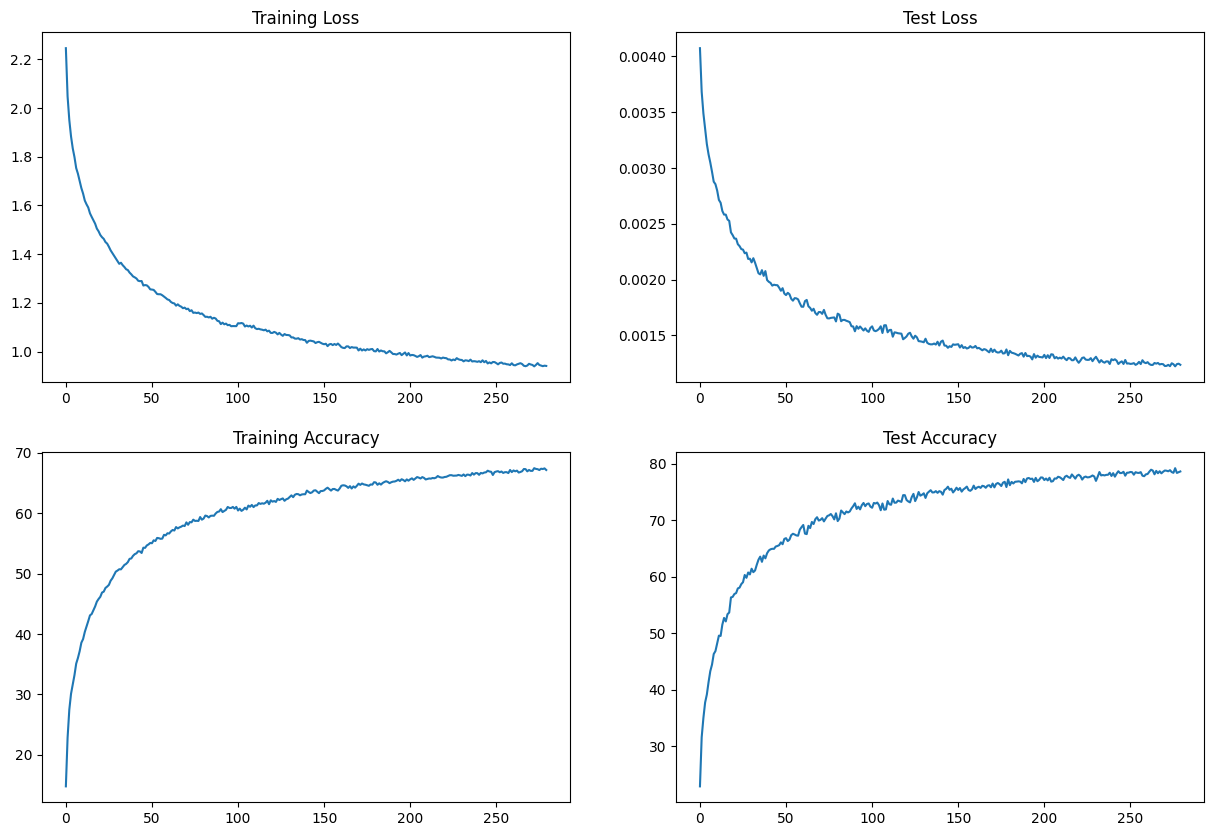

In [7]:
plot_acc_loss()